# Simulation 11: Seq Greedy v. Naive Timestep Sweep

TJ Kim
1/10/21

Run the eleventh simulation with the following considerations.

- 10 Servers, 15 Users, 30 TS
- Use ONE-mobility
- Job lengths: vr = 30, Assist = 30, AR = 30
- We share the same users and jobs between simulations

Resources: Normal
- All jobs are run with standard Quantity
- 14 level 1, 5 level 2, 1 level 3

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim11")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from sim11_setting import *

# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *
from Cloud_PlanGenerator import *

### Run Simulation across 10 trials for the groups

Heuristics - Sequential Greedy 

Baseline - Naive

In [3]:
num_trials = 10
SG_cost_stores = []
Naive_cost_stores = []
for i in range(num_trials):
    
    print("Trial Number:",i)

    users, servers, links, jobs, sim_param = simulation_setting()
    jobs2 = copy.deepcopy(jobs)
    for j in range(len(jobs2)):
        jobs2[j].info_from_usr(users[j],refresh_rate,refresh)
    
    # Make SG Prob
    # Set Refresh to false for SG
    refresh_rate = [0,0]
    refresh = False

    jobs2 = copy.deepcopy(jobs)
    for j in range(len(jobs2)):
        jobs2[j].info_from_usr(users[j],refresh_rate,refresh)
    
    print("SG prob...")
    SG_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs2, sim_param)
    SG_plan = Migration_Plans(users,jobs2,sim_param)
    SG_plan.from_seq_greedy(SG_prob)
    SG_cost_stores += [Cost_Recordings(SG_plan)]
    print("done!")
    
    # Make Naive Prob
    print("Naive prob...")
    Naive_prob = Naive_PlanGenerator(users, servers, links, jobs, sim_param)
    Naive_plan = Migration_Plans(users,jobs,sim_param)
    Naive_plan.from_seq_greedy(Naive_prob)
    Naive_cost_stores += [Cost_Recordings(Naive_plan)]
    print("done!")
    

Trial Number: 0
SG prob...
done!
Naive prob...
done!
Trial Number: 1
SG prob...
Struck Placement Resource (j,s,t): 7 1 0
Struck Placement Resource (j,s,t): 7 1 1
Struck Placement Resource (j,s,t): 7 1 2
Struck Placement Resource (j,s,t): 7 1 3
Struck Placement Resource (j,s,t): 7 1 4
Struck Placement Resource (j,s,t): 7 1 5
Struck Placement Resource (j,s,t): 7 1 6
Struck Placement Resource (j,s,t): 7 1 7
Struck Placement Resource (j,s,t): 7 1 8
Struck Placement Resource (j,s,t): 7 1 9
Struck Placement Resource (j,s,t): 7 1 10
Struck Placement Resource (j,s,t): 7 1 11
Struck Placement Resource (j,s,t): 7 1 12
Struck Placement Resource (j,s,t): 7 1 13
Struck Placement Resource (j,s,t): 7 1 14
Struck Placement Resource (j,s,t): 7 1 15
Struck Placement Resource (j,s,t): 7 1 16
Struck Placement Resource (j,s,t): 7 1 17
Struck Placement Resource (j,s,t): 7 1 18
Struck Placement Resource (j,s,t): 7 1 19
Struck Placement Resource (j,s,t): 7 1 20
Struck Placement Resource (j,s,t): 7 1 21
Struck

Struck Placement Resource (j,s,t): 19 1 0
Struck Placement Resource (j,s,t): 19 1 1
Struck Placement Resource (j,s,t): 19 1 2
Struck Placement Resource (j,s,t): 19 1 3
Struck Placement Resource (j,s,t): 19 1 4
Struck Placement Resource (j,s,t): 19 1 5
Struck Placement Resource (j,s,t): 19 1 6
Struck Placement Resource (j,s,t): 19 1 7
Struck Placement Resource (j,s,t): 19 1 8
Struck Placement Resource (j,s,t): 19 1 9
Struck Placement Resource (j,s,t): 19 1 10
Struck Placement Resource (j,s,t): 19 1 11
Struck Placement Resource (j,s,t): 19 1 12
Struck Placement Resource (j,s,t): 19 1 13
Struck Placement Resource (j,s,t): 19 1 14
Struck Placement Resource (j,s,t): 19 1 15
Struck Placement Resource (j,s,t): 19 1 16
Struck Placement Resource (j,s,t): 19 1 17
Struck Placement Resource (j,s,t): 19 1 18
Struck Placement Resource (j,s,t): 19 1 19
Struck Placement Resource (j,s,t): 19 1 20
Struck Placement Resource (j,s,t): 19 1 21
Struck Placement Resource (j,s,t): 19 1 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 17 1 0
Struck Placement Resource (j,s,t): 17 1 1
Struck Placement Resource (j,s,t): 17 1 2
Struck Placement Resource (j,s,t): 17 1 3
Struck Placement Resource (j,s,t): 17 1 4
Struck Placement Resource (j,s,t): 17 1 5
Struck Placement Resource (j,s,t): 17 1 6
Struck Placement Resource (j,s,t): 17 1 7
Struck Placement Resource (j,s,t): 17 1 8
Struck Placement Resource (j,s,t): 17 1 9
Struck Placement Resource (j,s,t): 17 1 10
Struck Placement Resource (j,s,t): 17 1 11
Struck Placement Resource (j,s,t): 17 1 12
Struck Placement Resource (j,s,t): 17 1 13
Struck Placement Resource (j,s,t): 17 1 14
Struck Placement Resource (j,s,t): 17 1 15
Struck Placement Resource (j,s,t): 17 1 16
Struck Placement Resource (j,s,t): 17 1 17
Struck Placement Resource (j,s,t): 17 1 18
Struck Placement Resource (j,s,t): 17 1 19
Struck Placement Resource (j,s,t): 17 1 20
Struck Placement Resource (j,s,t): 17 1 21
Struck Placement Resource (j,s,t): 17 1 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 5 5 0
Struck Placement Resource (j,s,t): 5 5 1
Struck Placement Resource (j,s,t): 5 5 2
Struck Placement Resource (j,s,t): 5 5 3
Struck Placement Resource (j,s,t): 5 5 4
Struck Placement Resource (j,s,t): 5 5 5
Struck Placement Resource (j,s,t): 5 5 6
Struck Placement Resource (j,s,t): 5 5 7
Struck Placement Resource (j,s,t): 5 5 8
Struck Placement Resource (j,s,t): 5 5 9
Struck Placement Resource (j,s,t): 5 5 10
Struck Placement Resource (j,s,t): 5 5 11
Struck Placement Resource (j,s,t): 5 5 12
Struck Placement Resource (j,s,t): 5 5 13
Struck Placement Resource (j,s,t): 5 5 14
Struck Placement Resource (j,s,t): 5 5 15
Struck Placement Resource (j,s,t): 5 5 16
Struck Placement Resource (j,s,t): 5 5 17
Struck Placement Resource (j,s,t): 5 5 18
Struck Placement Resource (j,s,t): 5 5 19
Struck Placement Resource (j,s,t): 5 5 20
Struck Placement Resource (j,s,t): 5 5 21
Struck Placement Resource (j,s,t): 5 5 22
Struck Placement Resource (j,s,t): 5 5 23
St

SG prob...
Struck Placement Resource (j,s,t): 5 5 0
Struck Placement Resource (j,s,t): 5 5 1
Struck Placement Resource (j,s,t): 5 5 2
Struck Placement Resource (j,s,t): 5 5 3
Struck Placement Resource (j,s,t): 5 5 4
Struck Placement Resource (j,s,t): 5 5 5
Struck Placement Resource (j,s,t): 5 5 6
Struck Placement Resource (j,s,t): 5 5 7
Struck Placement Resource (j,s,t): 5 5 8
Struck Placement Resource (j,s,t): 5 5 9
Struck Placement Resource (j,s,t): 5 5 10
Struck Placement Resource (j,s,t): 5 5 11
Struck Placement Resource (j,s,t): 5 5 12
Struck Placement Resource (j,s,t): 5 5 13
Struck Placement Resource (j,s,t): 5 5 14
Struck Placement Resource (j,s,t): 5 5 15
Struck Placement Resource (j,s,t): 5 5 16
Struck Placement Resource (j,s,t): 5 5 17
Struck Placement Resource (j,s,t): 5 5 18
Struck Placement Resource (j,s,t): 5 5 19
Struck Placement Resource (j,s,t): 5 5 20
Struck Placement Resource (j,s,t): 5 5 21
Struck Placement Resource (j,s,t): 5 5 22
Struck Placement Resource (j,s,t)

Struck Placement Resource (j,s,t): 15 8 1
Struck Placement Resource (j,s,t): 15 8 2
Struck Placement Resource (j,s,t): 15 8 3
Struck Placement Resource (j,s,t): 15 8 4
Struck Placement Resource (j,s,t): 15 8 5
Struck Placement Resource (j,s,t): 15 8 6
Struck Placement Resource (j,s,t): 15 8 7
Struck Placement Resource (j,s,t): 15 8 8
Struck Placement Resource (j,s,t): 15 8 9
Struck Placement Resource (j,s,t): 15 8 10
Struck Placement Resource (j,s,t): 15 8 11
Struck Placement Resource (j,s,t): 15 8 12
Struck Placement Resource (j,s,t): 15 8 13
Struck Placement Resource (j,s,t): 15 8 14
Struck Placement Resource (j,s,t): 15 8 15
Struck Placement Resource (j,s,t): 15 8 16
Struck Placement Resource (j,s,t): 15 8 17
Struck Placement Resource (j,s,t): 15 8 18
Struck Placement Resource (j,s,t): 15 8 19
Struck Placement Resource (j,s,t): 15 8 20
Struck Placement Resource (j,s,t): 15 8 21
Struck Placement Resource (j,s,t): 15 8 22
Struck Placement Resource (j,s,t): 15 8 23
Struck Placement Res

Struck Placement Resource (j,s,t): 19 8 1
Struck Placement Resource (j,s,t): 19 8 2
Struck Placement Resource (j,s,t): 19 8 3
Struck Placement Resource (j,s,t): 19 8 4
Struck Placement Resource (j,s,t): 19 8 5
Struck Placement Resource (j,s,t): 19 8 6
Struck Placement Resource (j,s,t): 19 8 7
Struck Placement Resource (j,s,t): 19 8 8
Struck Placement Resource (j,s,t): 19 8 9
Struck Placement Resource (j,s,t): 19 8 10
Struck Placement Resource (j,s,t): 19 8 11
Struck Placement Resource (j,s,t): 19 8 12
Struck Placement Resource (j,s,t): 19 8 13
Struck Placement Resource (j,s,t): 19 8 14
Struck Placement Resource (j,s,t): 19 8 15
Struck Placement Resource (j,s,t): 19 8 16
Struck Placement Resource (j,s,t): 19 8 17
Struck Placement Resource (j,s,t): 19 8 18
Struck Placement Resource (j,s,t): 19 8 19
Struck Placement Resource (j,s,t): 19 8 20
Struck Placement Resource (j,s,t): 19 8 21
Struck Placement Resource (j,s,t): 19 8 22
Struck Placement Resource (j,s,t): 19 8 23
Struck Placement Res

Struck Placement Resource (j,s,t): 12 5 0
Struck Placement Resource (j,s,t): 12 5 1
Struck Placement Resource (j,s,t): 12 5 2
Struck Placement Resource (j,s,t): 12 5 3
Struck Placement Resource (j,s,t): 12 5 4
Struck Placement Resource (j,s,t): 12 5 5
Struck Placement Resource (j,s,t): 12 5 6
Struck Placement Resource (j,s,t): 12 5 7
Struck Placement Resource (j,s,t): 12 5 8
Struck Placement Resource (j,s,t): 12 5 9
Struck Placement Resource (j,s,t): 12 5 10
Struck Placement Resource (j,s,t): 12 5 11
Struck Placement Resource (j,s,t): 12 5 12
Struck Placement Resource (j,s,t): 12 5 13
Struck Placement Resource (j,s,t): 12 5 14
Struck Placement Resource (j,s,t): 12 5 15
Struck Placement Resource (j,s,t): 12 5 16
Struck Placement Resource (j,s,t): 12 5 17
Struck Placement Resource (j,s,t): 12 5 18
Struck Placement Resource (j,s,t): 12 5 19
Struck Placement Resource (j,s,t): 12 5 20
Struck Placement Resource (j,s,t): 12 5 21
Struck Placement Resource (j,s,t): 12 5 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 15 7 0
Struck Placement Resource (j,s,t): 15 7 1
Struck Placement Resource (j,s,t): 15 7 2
Struck Placement Resource (j,s,t): 15 7 3
Struck Placement Resource (j,s,t): 15 7 4
Struck Placement Resource (j,s,t): 15 7 5
Struck Placement Resource (j,s,t): 15 7 6
Struck Placement Resource (j,s,t): 15 7 7
Struck Placement Resource (j,s,t): 15 7 8
Struck Placement Resource (j,s,t): 15 7 9
Struck Placement Resource (j,s,t): 15 7 10
Struck Placement Resource (j,s,t): 15 7 11
Struck Placement Resource (j,s,t): 15 7 12
Struck Placement Resource (j,s,t): 15 7 13
Struck Placement Resource (j,s,t): 15 7 14
Struck Placement Resource (j,s,t): 15 7 15
Struck Placement Resource (j,s,t): 15 7 16
Struck Placement Resource (j,s,t): 15 7 17
Struck Placement Resource (j,s,t): 15 7 18
Struck Placement Resource (j,s,t): 15 7 19
Struck Placement Resource (j,s,t): 15 7 20
Struck Placement Resource (j,s,t): 15 7 21
Struck Placement Resource (j,s,t): 15 7 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 8 0 0
Struck Placement Resource (j,s,t): 8 0 1
Struck Placement Resource (j,s,t): 8 0 2
Struck Placement Resource (j,s,t): 8 0 3
Struck Placement Resource (j,s,t): 8 0 4
Struck Placement Resource (j,s,t): 8 0 5
Struck Placement Resource (j,s,t): 8 0 6
Struck Placement Resource (j,s,t): 8 0 7
Struck Placement Resource (j,s,t): 8 0 8
Struck Placement Resource (j,s,t): 8 0 9
Struck Placement Resource (j,s,t): 8 0 10
Struck Placement Resource (j,s,t): 8 0 11
Struck Placement Resource (j,s,t): 8 0 12
Struck Placement Resource (j,s,t): 8 0 13
Struck Placement Resource (j,s,t): 8 0 14
Struck Placement Resource (j,s,t): 8 0 15
Struck Placement Resource (j,s,t): 8 0 16
Struck Placement Resource (j,s,t): 8 0 17
Struck Placement Resource (j,s,t): 8 0 18
Struck Placement Resource (j,s,t): 8 0 19
Struck Placement Resource (j,s,t): 8 0 20
Struck Placement Resource (j,s,t): 8 0 21
Struck Placement Resource (j,s,t): 8 0 22
Struck Placement Resource (j,s,t): 8 0 23
St

Struck Placement Resource (j,s,t): 17 0 0
Struck Placement Resource (j,s,t): 17 0 1
Struck Placement Resource (j,s,t): 17 0 2
Struck Placement Resource (j,s,t): 17 0 3
Struck Placement Resource (j,s,t): 17 0 4
Struck Placement Resource (j,s,t): 17 0 5
Struck Placement Resource (j,s,t): 17 0 6
Struck Placement Resource (j,s,t): 17 0 7
Struck Placement Resource (j,s,t): 17 0 8
Struck Placement Resource (j,s,t): 17 0 9
Struck Placement Resource (j,s,t): 17 0 10
Struck Placement Resource (j,s,t): 17 0 11
Struck Placement Resource (j,s,t): 17 0 12
Struck Placement Resource (j,s,t): 17 0 13
Struck Placement Resource (j,s,t): 17 0 14
Struck Placement Resource (j,s,t): 17 0 15
Struck Placement Resource (j,s,t): 17 0 16
Struck Placement Resource (j,s,t): 17 0 17
Struck Placement Resource (j,s,t): 17 0 18
Struck Placement Resource (j,s,t): 17 0 19
Struck Placement Resource (j,s,t): 17 0 20
Struck Placement Resource (j,s,t): 17 0 21
Struck Placement Resource (j,s,t): 17 0 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 17 7 11
Struck Placement Resource (j,s,t): 17 7 12
Struck Placement Resource (j,s,t): 17 7 13
Struck Placement Resource (j,s,t): 17 7 14
Struck Placement Resource (j,s,t): 17 7 15
Struck Placement Resource (j,s,t): 17 7 16
Struck Placement Resource (j,s,t): 17 7 17
Struck Placement Resource (j,s,t): 17 7 18
Struck Placement Resource (j,s,t): 17 7 19
Struck Placement Resource (j,s,t): 17 7 20
Struck Placement Resource (j,s,t): 17 7 21
Struck Placement Resource (j,s,t): 17 7 22
Struck Placement Resource (j,s,t): 17 7 23
Struck Placement Resource (j,s,t): 17 7 24
Struck Placement Resource (j,s,t): 17 7 25
Struck Placement Resource (j,s,t): 17 7 26
Struck Placement Resource (j,s,t): 17 7 27
Struck Placement Resource (j,s,t): 17 7 28
Struck Placement Resource (j,s,t): 17 7 29
Struck Placement Resource (j,s,t): 17 7 10
Struck Placement Resource (j,s,t): 18 6 4
Struck Placement Resource (j,s,t): 18 6 5
Struck Placement Resource (j,s,t): 18 6 10
Struck Placem

Struck Placement Resource (j,s,t): 11 2 0
Struck Placement Resource (j,s,t): 11 2 1
Struck Placement Resource (j,s,t): 11 2 2
Struck Placement Resource (j,s,t): 11 2 3
Struck Placement Resource (j,s,t): 11 2 4
Struck Placement Resource (j,s,t): 11 2 5
Struck Placement Resource (j,s,t): 11 2 6
Struck Placement Resource (j,s,t): 11 2 7
Struck Placement Resource (j,s,t): 11 2 8
Struck Placement Resource (j,s,t): 11 2 9
Struck Placement Resource (j,s,t): 11 2 10
Struck Placement Resource (j,s,t): 11 2 11
Struck Placement Resource (j,s,t): 11 2 12
Struck Placement Resource (j,s,t): 11 2 13
Struck Placement Resource (j,s,t): 11 2 14
Struck Placement Resource (j,s,t): 11 2 15
Struck Placement Resource (j,s,t): 11 2 16
Struck Placement Resource (j,s,t): 11 2 17
Struck Placement Resource (j,s,t): 11 2 18
Struck Placement Resource (j,s,t): 11 2 19
Struck Placement Resource (j,s,t): 11 2 20
Struck Placement Resource (j,s,t): 11 2 21
Struck Placement Resource (j,s,t): 11 2 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 11 2 0
Struck Placement Resource (j,s,t): 11 2 1
Struck Placement Resource (j,s,t): 11 2 2
Struck Placement Resource (j,s,t): 11 2 3
Struck Placement Resource (j,s,t): 11 2 4
Struck Placement Resource (j,s,t): 11 2 5
Struck Placement Resource (j,s,t): 11 2 6
Struck Placement Resource (j,s,t): 11 2 7
Struck Placement Resource (j,s,t): 11 2 8
Struck Placement Resource (j,s,t): 11 2 9
Struck Placement Resource (j,s,t): 11 2 10
Struck Placement Resource (j,s,t): 11 2 11
Struck Placement Resource (j,s,t): 11 2 12
Struck Placement Resource (j,s,t): 11 2 13
Struck Placement Resource (j,s,t): 11 2 14
Struck Placement Resource (j,s,t): 11 2 15
Struck Placement Resource (j,s,t): 11 2 16
Struck Placement Resource (j,s,t): 11 2 17
Struck Placement Resource (j,s,t): 11 2 18
Struck Placement Resource (j,s,t): 11 2 19
Struck Placement Resource (j,s,t): 11 2 20
Struck Placement Resource (j,s,t): 11 2 21
Struck Placement Resource (j,s,t): 11 2 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 15 0 0
Struck Placement Resource (j,s,t): 15 0 1
Struck Placement Resource (j,s,t): 15 0 2
Struck Placement Resource (j,s,t): 15 0 3
Struck Placement Resource (j,s,t): 15 0 4
Struck Placement Resource (j,s,t): 15 0 5
Struck Placement Resource (j,s,t): 15 0 6
Struck Placement Resource (j,s,t): 15 0 7
Struck Placement Resource (j,s,t): 15 0 8
Struck Placement Resource (j,s,t): 15 0 9
Struck Placement Resource (j,s,t): 15 0 10
Struck Placement Resource (j,s,t): 15 0 11
Struck Placement Resource (j,s,t): 15 0 12
Struck Placement Resource (j,s,t): 15 0 13
Struck Placement Resource (j,s,t): 15 0 14
Struck Placement Resource (j,s,t): 15 0 15
Struck Placement Resource (j,s,t): 15 0 16
Struck Placement Resource (j,s,t): 15 0 17
Struck Placement Resource (j,s,t): 15 0 18
Struck Placement Resource (j,s,t): 15 0 19
Struck Placement Resource (j,s,t): 15 0 20
Struck Placement Resource (j,s,t): 15 0 21
Struck Placement Resource (j,s,t): 15 0 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 16 0 0
Struck Placement Resource (j,s,t): 16 0 1
Struck Placement Resource (j,s,t): 16 0 2
Struck Placement Resource (j,s,t): 16 0 3
Struck Placement Resource (j,s,t): 16 0 4
Struck Placement Resource (j,s,t): 16 0 5
Struck Placement Resource (j,s,t): 16 0 6
Struck Placement Resource (j,s,t): 16 0 7
Struck Placement Resource (j,s,t): 16 0 8
Struck Placement Resource (j,s,t): 16 0 9
Struck Placement Resource (j,s,t): 16 0 10
Struck Placement Resource (j,s,t): 16 0 11
Struck Placement Resource (j,s,t): 16 0 12
Struck Placement Resource (j,s,t): 16 0 13
Struck Placement Resource (j,s,t): 16 0 14
Struck Placement Resource (j,s,t): 16 0 15
Struck Placement Resource (j,s,t): 16 0 16
Struck Placement Resource (j,s,t): 16 0 17
Struck Placement Resource (j,s,t): 16 0 18
Struck Placement Resource (j,s,t): 16 0 19
Struck Placement Resource (j,s,t): 16 0 20
Struck Placement Resource (j,s,t): 16 0 21
Struck Placement Resource (j,s,t): 16 0 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 17 4 0
Struck Placement Resource (j,s,t): 17 4 1
Struck Placement Resource (j,s,t): 17 4 2
Struck Placement Resource (j,s,t): 17 4 3
Struck Placement Resource (j,s,t): 17 4 4
Struck Placement Resource (j,s,t): 17 4 5
Struck Placement Resource (j,s,t): 17 4 6
Struck Placement Resource (j,s,t): 17 4 7
Struck Placement Resource (j,s,t): 17 4 8
Struck Placement Resource (j,s,t): 17 4 9
Struck Placement Resource (j,s,t): 17 4 10
Struck Placement Resource (j,s,t): 17 4 11
Struck Placement Resource (j,s,t): 17 4 12
Struck Placement Resource (j,s,t): 17 4 13
Struck Placement Resource (j,s,t): 17 4 14
Struck Placement Resource (j,s,t): 17 4 15
Struck Placement Resource (j,s,t): 17 4 16
Struck Placement Resource (j,s,t): 17 4 17
Struck Placement Resource (j,s,t): 17 4 18
Struck Placement Resource (j,s,t): 17 4 19
Struck Placement Resource (j,s,t): 17 4 20
Struck Placement Resource (j,s,t): 17 4 21
Struck Placement Resource (j,s,t): 17 4 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 10 4 0
Struck Placement Resource (j,s,t): 10 4 1
Struck Placement Resource (j,s,t): 10 4 2
Struck Placement Resource (j,s,t): 10 4 3
Struck Placement Resource (j,s,t): 10 4 4
Struck Placement Resource (j,s,t): 10 4 5
Struck Placement Resource (j,s,t): 10 4 6
Struck Placement Resource (j,s,t): 10 4 7
Struck Placement Resource (j,s,t): 10 4 8
Struck Placement Resource (j,s,t): 10 4 9
Struck Placement Resource (j,s,t): 10 4 10
Struck Placement Resource (j,s,t): 10 4 11
Struck Placement Resource (j,s,t): 10 4 12
Struck Placement Resource (j,s,t): 10 4 13
Struck Placement Resource (j,s,t): 10 4 14
Struck Placement Resource (j,s,t): 10 4 15
Struck Placement Resource (j,s,t): 10 4 16
Struck Placement Resource (j,s,t): 10 4 17
Struck Placement Resource (j,s,t): 10 4 18
Struck Placement Resource (j,s,t): 10 4 19
Struck Placement Resource (j,s,t): 10 4 20
Struck Placement Resource (j,s,t): 10 4 21
Struck Placement Resource (j,s,t): 10 4 22
Struck Placement Reso

Struck Placement Resource (j,s,t): 16 4 0
Struck Placement Resource (j,s,t): 16 8 1
Struck Placement Resource (j,s,t): 16 8 2
Struck Placement Resource (j,s,t): 16 8 0
Struck Placement Resource (j,s,t): 17 8 0
Struck Placement Resource (j,s,t): 17 8 1
Struck Placement Resource (j,s,t): 17 4 0
Struck Placement Resource (j,s,t): 18 8 0
Struck Placement Resource (j,s,t): 18 8 1
Struck Placement Resource (j,s,t): 18 8 2
Struck Placement Resource (j,s,t): 18 8 3
Struck Placement Resource (j,s,t): 18 8 4
Struck Placement Resource (j,s,t): 18 8 5
Struck Placement Resource (j,s,t): 18 8 6
Struck Placement Resource (j,s,t): 18 8 7
Struck Placement Resource (j,s,t): 18 8 8
Struck Placement Resource (j,s,t): 18 8 9
Struck Placement Resource (j,s,t): 18 8 10
Struck Placement Resource (j,s,t): 18 8 11
Struck Placement Resource (j,s,t): 18 8 12
Struck Placement Resource (j,s,t): 18 8 13
Struck Placement Resource (j,s,t): 18 8 14
Struck Placement Resource (j,s,t): 18 8 15
Struck Placement Resource (j

Struck Placement Resource (j,s,t): 19 8 0
Struck Placement Resource (j,s,t): 19 8 1
Struck Placement Resource (j,s,t): 19 8 2
Struck Placement Resource (j,s,t): 19 8 3
Struck Placement Resource (j,s,t): 19 8 4
Struck Placement Resource (j,s,t): 19 8 5
Struck Placement Resource (j,s,t): 19 8 6
Struck Placement Resource (j,s,t): 19 8 7
Struck Placement Resource (j,s,t): 19 8 8
Struck Placement Resource (j,s,t): 19 8 9
Struck Placement Resource (j,s,t): 19 8 10
Struck Placement Resource (j,s,t): 19 8 11
Struck Placement Resource (j,s,t): 19 8 12
Struck Placement Resource (j,s,t): 19 8 13
Struck Placement Resource (j,s,t): 19 8 14
Struck Placement Resource (j,s,t): 19 8 15
Struck Placement Resource (j,s,t): 19 8 16
Struck Placement Resource (j,s,t): 19 8 17
Struck Placement Resource (j,s,t): 19 8 18
Struck Placement Resource (j,s,t): 19 8 19
Struck Placement Resource (j,s,t): 19 8 20
Struck Placement Resource (j,s,t): 19 8 21
Struck Placement Resource (j,s,t): 19 8 22
Struck Placement Reso

### Pickle the simulation results

In [9]:
import pickle

cost_stores_dic = {}
cost_stores_dic["SG"] = SG_cost_stores
cost_stores_dic["Naive"] = Naive_cost_stores
pickle.dump(cost_stores_dic, open(os.path.curdir + "/sim_store/sim11/cost_store.p", "wb" ) )

### Plot Results
Plot cost per timestep averaged over all trials.

In [15]:
SG_cost_stores[0].all_cost_instance['total_cost'].shape

(30,)

In [16]:
SG_cost_per_time = np.zeros(sim_param.time_steps)
Naive_cost_per_time = np.zeros(sim_param.time_steps)

for i in range(num_trials):
    SG_cost_per_time += np.divide(SG_cost_stores[i].all_cost_instance['total_cost'],num_trials)
    Naive_cost_per_time += np.divide(Naive_cost_stores[i].all_cost_instance['total_cost'],num_trials)

In [17]:
SG_cost_per_time

array([ 6.29326148,  8.62438028,  9.35746946,  8.97335854,  9.01891646,
        9.36547333,  9.71489799,  9.43409957,  9.49495197,  9.50265872,
        9.5303172 ,  9.94498391, 10.1666147 , 10.66717749, 11.38152674,
       11.47466922, 11.60558949, 11.56093018, 12.18598181, 12.41503785,
       12.8655672 , 13.57619556, 13.50601296, 13.90186452, 14.41972253,
       14.60601329, 14.73098255, 15.03900498, 15.2647996 , 15.41281044])

In [18]:
Naive_cost_per_time

array([ 5.24903942,  8.61085841,  9.95699676, 10.05633301, 10.94849413,
       11.40442277, 11.60659148, 11.18409826, 11.88196947, 11.28790137,
       11.28349801, 12.09873157, 12.72721311, 13.74397756, 13.78663514,
       13.96601402, 13.91324401, 14.20684516, 15.25628246, 14.87775454,
       15.32586845, 15.91564729, 15.69227134, 15.54895049, 16.18796281,
       17.06622989, 17.12960391, 17.42284082, 17.42088795, 16.88664432])

Text(0, 0.5, 'Cost Per Time Step (Dollars)')

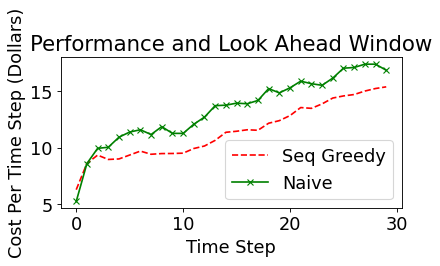

In [22]:
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
figure(num=None, figsize=(5.5, 2.5), dpi=80, facecolor='w', edgecolor='k')

x_ax = np.arange(30)

plt.plot(x_ax, SG_cost_per_time, 'r--', label = 'Seq Greedy')
plt.plot(x_ax, Naive_cost_per_time, 'g-x', label = 'Naive')

#plt.plot(x_ax, np.multiply(batch_0_migs,1/len(jobs)), 'r--', label = 'Seq Greedy')
#plt.plot(x_ax, np.multiply(batch_6_migs,1/len(jobs)), 'g-x', label = 'Batch size 6')
#plt.plot(x_ax, np.multiply(batch_3_migs,1/len(jobs)), 'b-o', label = 'Batch size 3')
# plt.xticks(x_ax)
# plt.xscale('log')
plt.legend(loc = 'lower right')

plt.title('Performance and Look Ahead Window')
plt.xlabel('Time Step')
plt.ylabel('Cost Per Time Step (Dollars)')